## 1. Tutorial

### Biblioteka numpy

Numpy jest biblioteką do obliczeń numerycznych. Szczególnie dobrze nadaje się do operacji na macierzach
i wektorach.

Zwróć uwagę:

- numpy działa w oparciu nie o wbudowany typ <b>list</b>, ale o specjalny typ macierzowy <b>array</b>.
- <b>array</b> <a href="http://scipy-lectures.org/intro/numpy/array_object.html">umożliwia bardzo wygodne “krojenie” macierzy</a>

In [5]:
# !pip install numpy
# !pip install matplotlib
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]

     |████████████████████████████████| 10.3 MB 2.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 95.5 MB/s eta 0:00:01


In [6]:
x = [1, 2, 3, 4, 5, 6 ]
v = np.array(x)
v

array([1, 2, 3, 4, 5, 6])

In [7]:
M = np.array([[1,2], [3,4]])
M

array([[1, 2],
       [3, 4]])

In [8]:
type(v), type(M)

(numpy.ndarray, numpy.ndarray)

In [9]:
v.shape

(6,)

In [10]:
M.shape

(2, 2)

In [11]:
M.dtype

dtype('int64')

In [12]:
np.random.rand(5,3)

array([[0.98380219, 0.50645682, 0.43351114],
       [0.95547423, 0.09523712, 0.07498549],
       [0.63199073, 0.41585332, 0.50404507],
       [0.54972983, 0.89451495, 0.85392212],
       [0.0852158 , 0.901492  , 0.25044325]])

In [77]:
M = np.array([[1,2,3], [4,5,6]])
N = np.array([[1,1,1], [2,2,2]])
print(N)
print(M)

[[1 1 1]
 [2 2 2]]
[[1 2 3]
 [4 5 6]]


In [14]:
M+N

array([[2, 3, 4],
       [6, 7, 8]])

In [15]:
5*M

array([[ 5, 10, 15],
       [20, 25, 30]])

In [16]:
M*N

array([[ 1,  2,  3],
       [ 8, 10, 12]])

In [17]:
# Mnożenie macierzy
M.dot(N)

ValueError: shapes (2,3) and (2,3) not aligned: 3 (dim 1) != 2 (dim 0)

In [78]:
# Transpozycja
M.dot(N.T)

array([[ 6, 12],
       [15, 30]])

In [19]:
# Generowanie rownych odstepow
v=np.linspace(0,10,21)
v

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ])

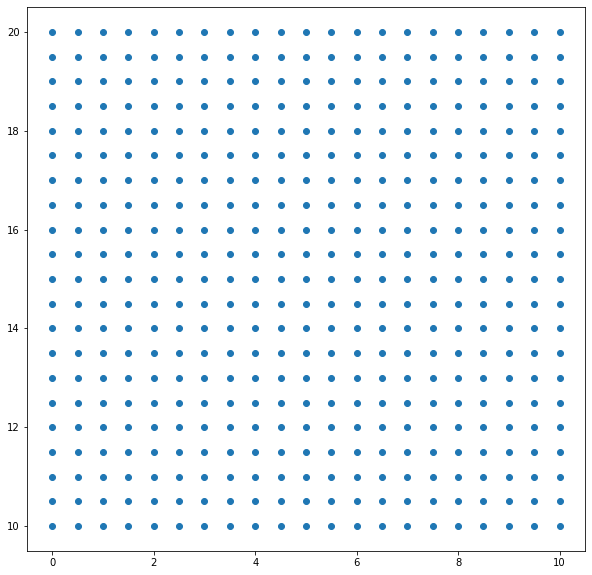

In [20]:
# Generowanie macierzy współrzędnych
x=np.linspace(0,10,21)
y=np.linspace(10,20,21)
xx, yy = np.meshgrid(x, y)
plt.scatter(xx,yy)

In [21]:
np.sin(v)

array([ 0.        ,  0.47942554,  0.84147098,  0.99749499,  0.90929743,
        0.59847214,  0.14112001, -0.35078323, -0.7568025 , -0.97753012,
       -0.95892427, -0.70554033, -0.2794155 ,  0.21511999,  0.6569866 ,
        0.93799998,  0.98935825,  0.79848711,  0.41211849, -0.07515112,
       -0.54402111])

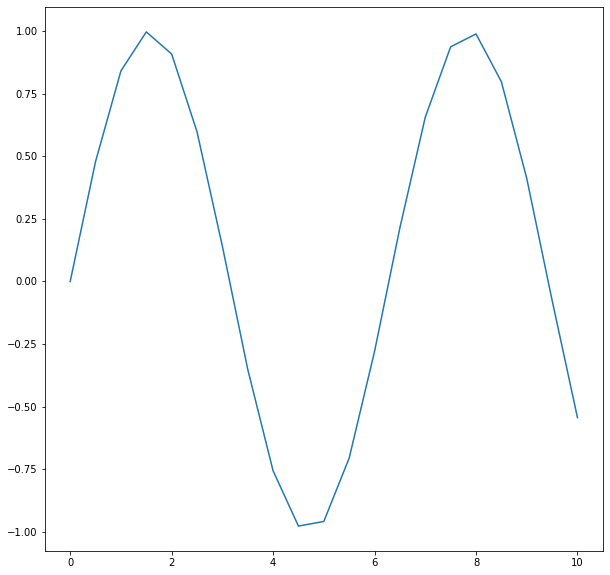

In [22]:
plt.plot(v, np.sin(v))
plt.show()

In [23]:
M = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12], [13,14,15,16]])
M

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

In [24]:
# Krojenie macierzy
# Wszystkie wiersze razy 2ga (trzecia) kolumna
M[:,2]

array([ 3,  7, 11, 15])

In [26]:
M[2,1:3]

array([10, 11])

In [27]:
M[1:3,2:4]

array([[ 7,  8],
       [11, 12]])

In [28]:
M[::2,:]

array([[ 1,  2,  3,  4],
       [ 9, 10, 11, 12]])

In [29]:
M

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

In [30]:
M[::2,::2]=0
M

array([[ 0,  2,  0,  4],
       [ 5,  6,  7,  8],
       [ 0, 10,  0, 12],
       [13, 14, 15, 16]])

### Kolory, obrazy

In [36]:
def gen_img(n=9, start=-1.5, end=1.5, size=2000):
    # Inicjalizacja danych
    x = np.linspace(start, end, size)
    y = np.linspace(start, end, size)
    xx, yy = np.meshgrid(x, y)
    Z = xx+yy*1j # Tworzymy macierz wartości zespolonych
    
    for i in range(50):
        #Z =  ((n-1)/n)*Z + (1/n)*(1/(Z**(n-1))) # alternatywny obraz
        Z = ((n**2-12/n**2)/n**2) * Z - 3/n**2 + (1/n**3)*(1/(Z**(n-1)))

    # Argument liczby zespolonej
    img = np.angle(Z)
    # Normalizacja do zakresu 0-255
    return 255*(img - np.min(img))/np.ptp(img)

In [71]:
# Można również przetestować funkcję dla innych n niż domyślne
img = gen_img(n=19, start=0, end=2.5, size=2000)

/tmp/ipykernel_13802/1236400077.py:10: RuntimeWarning: divide by zero encountered in true_divide
  Z = ((n**2-12/n**2)/n**2) * Z - 3/n**2 + (1/n**3)*(1/(Z**(n-1)))
/tmp/ipykernel_13802/1236400077.py:10: RuntimeWarning: invalid value encountered in true_divide
  Z = ((n**2-12/n**2)/n**2) * Z - 3/n**2 + (1/n**3)*(1/(Z**(n-1)))
/tmp/ipykernel_13802/1236400077.py:10: RuntimeWarning: invalid value encountered in multiply
  Z = ((n**2-12/n**2)/n**2) * Z - 3/n**2 + (1/n**3)*(1/(Z**(n-1)))
/tmp/ipykernel_13802/1236400077.py:10: RuntimeWarning: overflow encountered in power
  Z = ((n**2-12/n**2)/n**2) * Z - 3/n**2 + (1/n**3)*(1/(Z**(n-1)))
/tmp/ipykernel_13802/1236400077.py:10: RuntimeWarning: invalid value encountered in power
  Z = ((n**2-12/n**2)/n**2) * Z - 3/n**2 + (1/n**3)*(1/(Z**(n-1)))
/tmp/ipykernel_13802/1236400077.py:10: RuntimeWarning: overflow encountered in true_divide
  Z = ((n**2-12/n**2)/n**2) * Z - 3/n**2 + (1/n**3)*(1/(Z**(n-1)))


In [33]:
# Funkcja zwraca dwuwymiarową tablicę wartości z zakresu 0-255
print(img)

[[ 16.68280748  16.68929429  16.69578587 ...  52.07846355  52.11589428
   52.15334503]
 [ 16.66792938  16.67441177  16.68089893 ...  52.06745447  52.10491744
   52.14240048]
 [ 16.65304652  16.65952448  16.66600721 ...  52.05642528  52.09392053
   52.13143591]
 ...
 [238.34695348 238.34047552 238.33399279 ... 202.94357472 202.90607947
  202.86856409]
 [238.33207062 238.32558823 238.31910107 ... 202.93254553 202.89508256
  202.85759952]
 [238.31719252 238.31070571 238.30421413 ... 202.92153645 202.88410572
  202.84665497]]


/home2/student/.local/lib/python3.8/site-packages/matplotlib/image.py:443: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/home2/student/.local/lib/python3.8/site-packages/matplotlib/image.py:444: UserWarning: Warning: converting a masked element to nan.
  vmid = np.float64(self.norm.vmin) + dv / 2


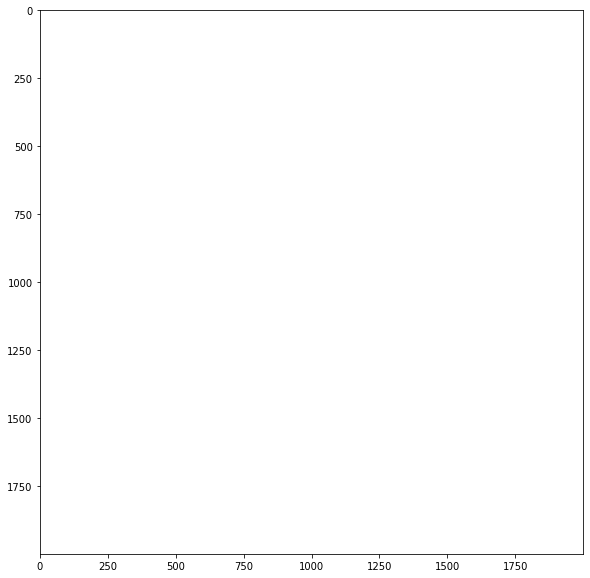

In [70]:
# Wyświetlanie numpy array jako obrazu
plt.imshow(img)

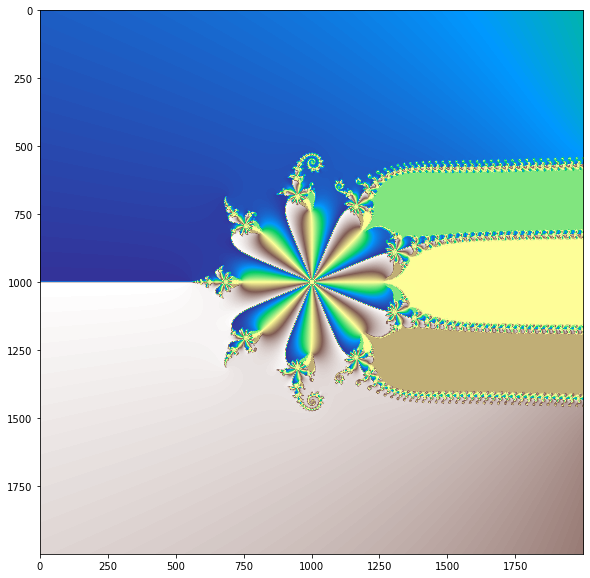

In [39]:
# Zmiana mapy kolorów
plt.imshow(img, cmap="terrain")

<a href="https://www.cs.put.poznan.pl/rsusmaga/Dydaktyka/TO--2017/TO-cz-1-wykladu-13-sent.pdf">Źródło</a> kodu generującego obraz wraz z objaśnieniem.

### Biblioteka skimage

In [44]:
# !pip install scikit-image
from skimage import io
from skimage import color

# Wczytywanie obrazu
img = io.imread('pic.jpg')

In [45]:
# Obraz RGB
print(img[50:54,50:54])

[[[140 161 162]
  [138 159 160]
  [150 171 172]
  [161 182 183]]

 [[190 211 212]
  [209 230 231]
  [214 235 236]
  [175 196 197]]

 [[193 217 217]
  [138 162 162]
  [147 171 171]
  [153 177 177]]

 [[118 142 142]
  [ 87 111 111]
  [147 171 171]
  [124 148 148]]]


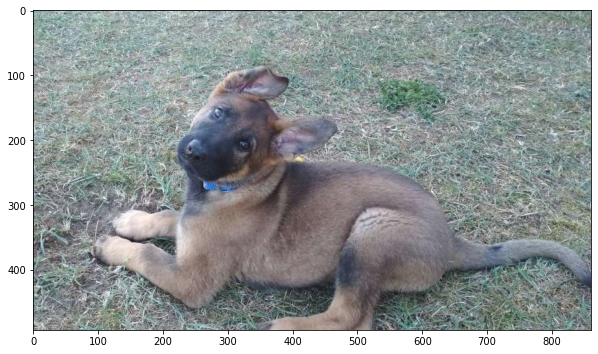

In [46]:
plt.imshow(img)

In [47]:
# Wczytywanie z konwersją RGB -> skala szarości
img_bw = io.imread('pic.jpg', as_gray=True)

In [48]:
print(img_bw[50:54,50:54])

[[0.61415529 0.60631216 0.65337098 0.69650824]
 [0.81023373 0.88474353 0.90435137 0.7514102 ]
 [0.83098039 0.61529412 0.65058824 0.67411765]
 [0.53686275 0.41529412 0.65058824 0.56039216]]


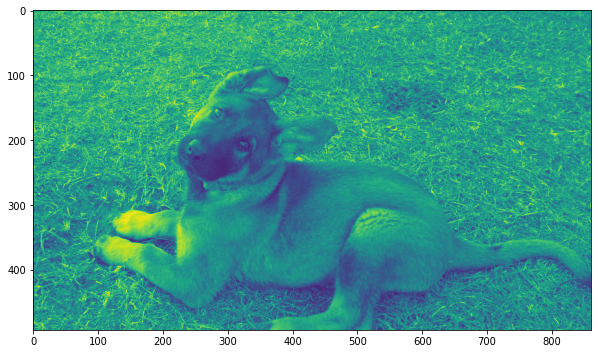

In [49]:
plt.imshow(img_bw)

In [81]:
# Konwersja z RGB na skalę szarości
img_bw2 = color.rgb2gray(img)

/tmp/ipykernel_13802/1482270159.py:2: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  img_bw2 = color.rgb2gray(img)


### Dźwięk

In [54]:
# !pip install playsound
# !pip install scipy
from playsound import playsound
from scipy.io import wavfile

In [61]:
# Odtwarzanie dźwięku
playsound('err.wav')

In [56]:
# Wczytywanie pliku wav
# samplerate to częstotliwość próbkowania, data to próbki
samplerate, data = wavfile.read('err.wav')

In [57]:
# Zapisanie pliku wav
wavfile.write("test.wav", samplerate, data)

In [58]:
# Sprawdzenie liczby próbek i liczby kanałów
np.shape(data)

(42880, 2)

## 2. Zadania

### Biblioteka numpy

1. Utwórz macierz 2D:

[ 1, 3, 1, 2]<br>
[ 1, 2, 5, 8]<br>
[ 3, 1, 2, 9]<br>
[ 5, 4, 2, 1]<br>

In [63]:
M = np.array([[1,3, 1, 2], [1, 2, 5, 8], [3, 1, 2, 9], [ 5, 4, 2, 1]])
M

array([[1, 3, 1, 2],
       [1, 2, 5, 8],
       [3, 1, 2, 9],
       [5, 4, 2, 1]])

2. Wytnij z utworzonej macierzy pierwszy i ostatni wiersz oraz ostatnią kolumnę.

In [64]:
M[1:3]

array([[1, 2, 5, 8],
       [3, 1, 2, 9]])

3. Utwórz macierz 2D:

[ 2, 3, 1]<br>
[ 5, 1, 3]<br>

In [82]:
M = np.array([[2, 3, 1],[5, 1, 3]])
M

array([[2, 3, 1],
       [5, 1, 3]])

4. Dokonaj transpozycji powyższej macierzy.

In [83]:
M = np.transpose(M)
M

array([[2, 5],
       [3, 1],
       [1, 3]])

5. Oblicz iloczyn macierzy z punktu 2 i 4.

In [85]:
M = M.dot(M[1:3])
M

array([[212, 236],
       [136, 120],
       [120, 136]])

6. Stwórz wykres funkcji sin w przedziale od −π do π z liczbą punktów równą: 3, 10, 100.

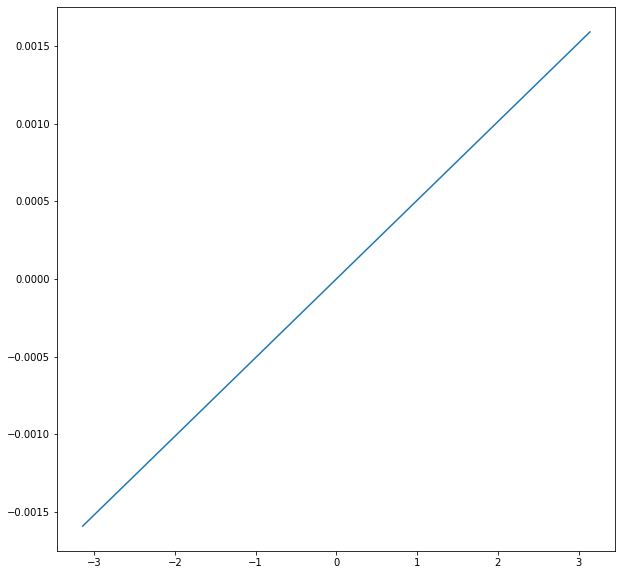

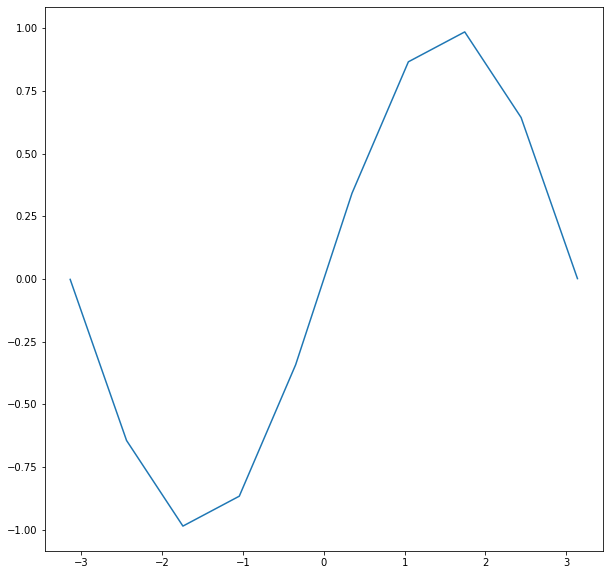

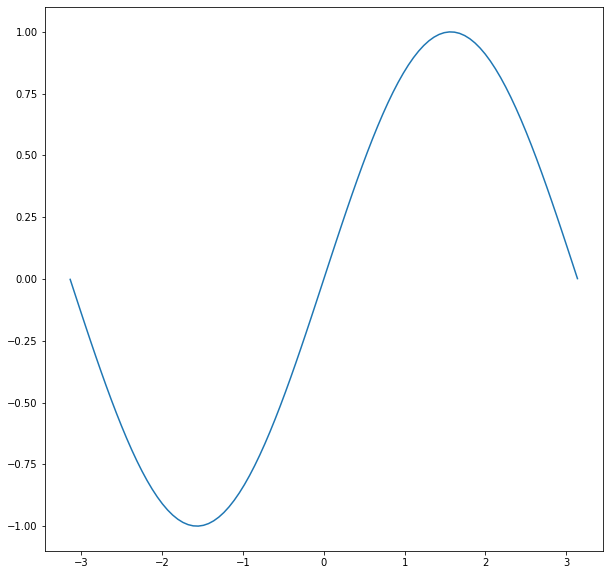

In [93]:
v1 = np.linspace(-3.14, 3.14, 3)
v2 = np.linspace(-3.14, 3.14, 10)
v3 = np.linspace(-3.14, 3.14, 100)
plt.plot(v1, np.sin(v1))
plt.show()
plt.plot(v2, np.sin(v2))
plt.show()
plt.plot(v3, np.sin(v3))
plt.show()

### Obrazy

1. Przetestuj różne mapy kolorów korzystając z obrazu wygenerowanego przy użyciu funkcji gen_img()

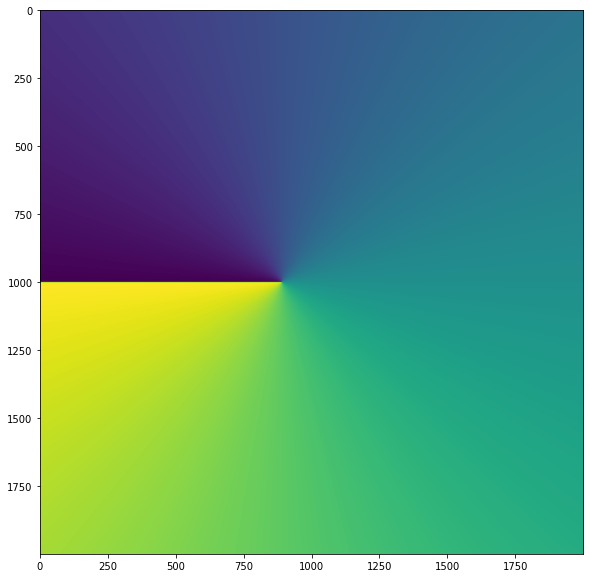

In [97]:
img = gen_img(n=1)
plt.imshow(img)

2. Wczytaj obraz z pliku "pic.jpg" i sprawdź wymiary tablicy

In [104]:
img2 = io.imread('pic.jpg')
img2.shape

(493, 861, 3)

3. Przekonwertuj obraz do skali szarości i sprawdź wymiary tablicy

In [105]:
img_bw = io.imread('pic.jpg', as_gray=True)
img_bw.shape

(493, 861)

4. Wyświetl obraz w skali szarości (poszukaj odpowiedniej mapy kolorów)

In [ ]:
img_bw = io.imread('pic.jpg', as_gray=True)
img_bw.shape

5. Wykadruj obraz tak aby na obrazie pozostała tylko głowa

6. Dokonaj inwersji kolorów (stwórz "negatyw" obrazu)

7. Korzystając z numpy wygeneruj poniższy obraz

![title](gradient.png)

8. Korzystając z numpy wygeneruj poniższy obraz

![title](goal.png)

### Dźwięki

1. Wczytaj pllik "err.wav"

2. Wyświetl wymiary tablicy przechowującej plik

3. Stwórz wykres przebiegu sygnału w czasie

4. Wczytaj plik "leto.wav"

5. Zastosuj efekt fade in (stopniowe zgłaśnianie) przemnażając próbki przez odpowiednie wagi i zapisując efekt do pliku .wav. Pamiętaj że nagranie ma dwie ścieżki.

6. Powtórz poprzednie polecenie, tym razem stosując fade-in logarytmiczny. Jaka jest różnica w porównaniu do poprzedniego podejścia? Dlaczego tak się dzieje? 

7. Odejmij od siebie wartości próbek w obu kanałach, podziel wynik przez dwa i zapisz do pliku .wav. Pamiętaj żeby przed zapisem do pliku przekonwertować wynik tej operacji na <b>int</b> korzystając z <b>astype('int16')</b>. Co się stało z nagraniem? Jaka jest tego przyczyna?